In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [108]:
%run -i ./ownlib/PHT-Library2.ipynb

In [59]:
def imshow(imgdata, title=''):
    imgdata_abs = np.abs(imgdata)
    plt.figure()
    plt.title(title)
    plt.imshow(imgdata_abs, cmap = 'gray')
    plt.show()

def imshow2(imgdata1, imgdata2, title=''):
    imgdata1_abs = np.abs(imgdata1)
    imgdata2_abs = np.abs(imgdata2)
    fig = plt.figure()
    plt.axis('off')
    plt.title(title)
    fig.add_subplot(1, 2, 1)
    plt.imshow(imgdata1_abs, cmap = 'gray')
    fig.add_subplot(1, 2, 2)
    plt.imshow(imgdata2_abs, cmap = 'gray')
    plt.show()
    
def imsave(imgdata, filename, title=''):
    imgdata_abs = np.abs(imgdata)
    plt.figure()
    plt.title(title)
    plt.imshow(imgdata_abs, cmap = 'gray')
    plt.savefig('dist/' + filename+'.png')

In [30]:
N = 50
G = 5
ori_img = cv2.imread('./assets/maudy.png', 0)
logo = cv2.imread('./assets/ecorp.png', 0)

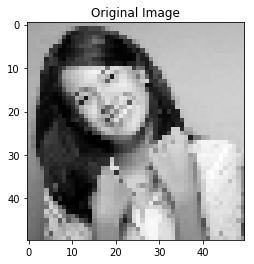

In [7]:
P = G-1
T_STEP = int(P / 1) + 1
I_STEP = int(N / 2) + 1

logo = cv2.resize(logo, (G, G))
img = cv2.resize(ori_img, (N, N))
imshow(img, 'Original Image')

Progress: [####################] 100.0%


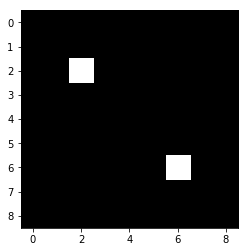

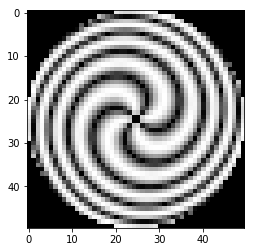

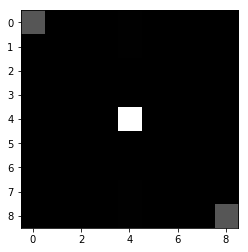

In [109]:
logo = np.zeros((9,9))
logo[2,2] = 1
logo[6,6] = 1
im_correction = inversePHT(logo, N, P)
mm_after = transformPHT(np.abs(im_correction), N, P)

imshow(logo)
imshow(im_correction)
imshow(mm_after)

Progress: [####################] 100.0%


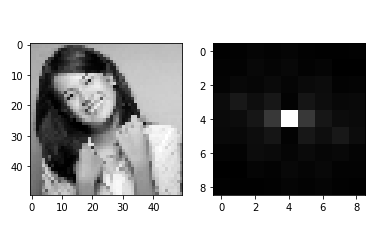

In [91]:
im1 = np.copy(img)
mm1 = transformPHT(im1, N, P)
imshow2(im1, mm1)

Progress: [####################] 100.0%


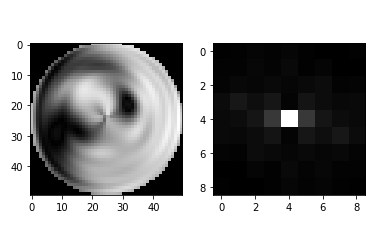

In [92]:
im2 = inversePHT(mm1, N, P)
mm2 = transformPHT(np.abs(im2), N, P)
imshow2(im2, mm2)

Progress: [####################] 100.0%


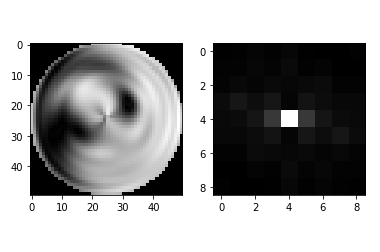

In [93]:
im3 = inversePHT(mm2, N, P)
mm3 = transformPHT(np.abs(im3), N, P)
imshow2(im3, mm3)

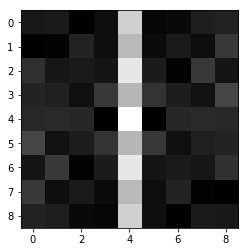

[[0.15557087 0.16414036 0.05301381 0.10580403 1.00433797 0.06966743
  0.08961548 0.18386332 0.20271403]
 [0.04333371 0.05724612 0.20526335 0.10940069 0.90397306 0.09323002
  0.16393165 0.10820472 0.30541693]
 [0.26396858 0.14426791 0.16171502 0.14246653 1.11561176 0.17087842
  0.05516736 0.30244069 0.14011568]
 [0.21220714 0.19779067 0.11859036 0.30785118 0.88809272 0.2809017
  0.17835987 0.12033516 0.36666933]
 [0.23093744 0.23582469 0.22495453 0.04036244 1.23050514 0.04036244
  0.22495453 0.23582469 0.23093744]
 [0.36666933 0.12033516 0.17835987 0.2809017  0.88809272 0.30785118
  0.11859036 0.19779067 0.21220714]
 [0.14011568 0.30244069 0.05516736 0.17087842 1.11561176 0.14246653
  0.16171502 0.14426791 0.26396858]
 [0.30541693 0.10820472 0.16393165 0.09323002 0.90397306 0.10940069
  0.20526335 0.05724612 0.04333371]
 [0.20271403 0.18386332 0.08961548 0.06966743 1.00433797 0.10580403
  0.05301381 0.16414036 0.15557087]]


In [96]:
imshow(mm2-mm1)
print(np.abs(mm2-mm1))

In [82]:
np.abs(mm2) / np.abs(mm3)

array([[0.90277741, 1.00539521, 1.02210784, 1.00076263, 0.80321955,
        1.03213843, 1.05387581, 1.25947795, 0.90800931],
       [0.9558831 , 0.97062536, 1.02178271, 1.00227895, 0.86957707,
        1.03588104, 1.01910672, 0.73877358, 0.81661098],
       [0.96161328, 0.9855941 , 1.01225598, 1.01292505, 0.81068612,
        1.01761071, 1.00236517, 0.93563204, 1.05584369],
       [1.02282068, 1.00331783, 1.00144095, 1.0022449 , 0.75278555,
        1.01317214, 1.0069472 , 0.97792936, 1.03486422],
       [1.01758181, 1.00490795, 1.00500683, 0.99779317, 0.99198126,
        0.99779317, 1.00500683, 1.00490795, 1.01758181],
       [1.03486422, 0.97792936, 1.0069472 , 1.01317214, 0.75278555,
        1.0022449 , 1.00144095, 1.00331783, 1.02282068],
       [1.05584369, 0.93563204, 1.00236517, 1.01761071, 0.81068612,
        1.01292505, 1.01225598, 0.9855941 , 0.96161328],
       [0.81661098, 0.73877358, 1.01910672, 1.03588104, 0.86957707,
        1.00227895, 1.02178271, 0.97062536, 0.9558831 ],


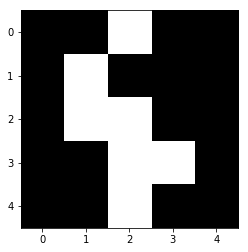

In [9]:
Q_STEP = 0.6
logobw = (logo >= 128)
logovec = logobw.reshape([G*G])
imshow(logobw)

Progress: [####################] 100.0%


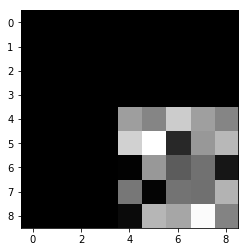

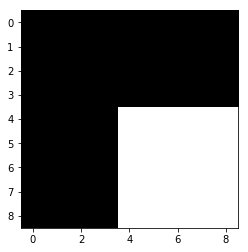

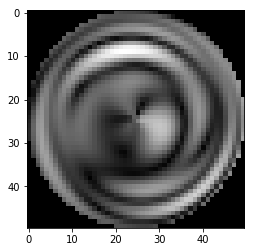

In [10]:
q_noise = momen_abs - np.floor(momen_abs / Q_STEP) * Q_STEP
Q = np.floor(momen_abs / Q_STEP) % 2 == 1

logobw2 = np.rot90(np.rot90(logobw))
logodouble = np.zeros([2 * P + 1, 2 * P + 1])
momen_filter = np.zeros([2 * P + 1, 2 * P + 1])
# logodouble[0:G,0:G] = logobw2
logodouble[P:P+G,P:P+G] = logobw
# momen_filter[0:G,0:G] = 1
momen_filter[P:P+G,P:P+G] = 1


momen_mod_1 = (Q == logodouble)
momen_mod_2 = np.logical_and(Q != logodouble, q_noise >  (Q_STEP / 2))
momen_mod_3 = np.logical_and(Q != logodouble, q_noise <= (Q_STEP / 2))

momen_mod = - q_noise + 0.5 * Q_STEP * momen_mod_1 + 1.5 * Q_STEP * momen_mod_2 - 0.5 * Q_STEP * momen_mod_3
momen_mod = momen_mod * momen_filter

momen2 = momen_mod / np.abs(momen) * momen

correction = inversePHT(momen2, N, P)
imshow(momen_mod)
imshow(momen_filter)
imshow(correction)

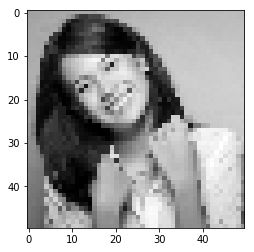

In [11]:
img_watermarked = img + np.abs(correction)
imshow(img_watermarked)

Progress: [####################] 100.0%


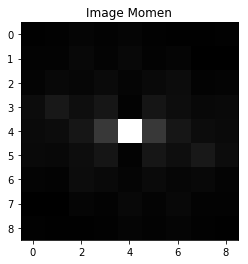

In [12]:
momen3 = transformPHT(img_watermarked, N, P)
momen_abs3 = np.abs(momen3)
imshow(momen_abs3, 'Image Momen')

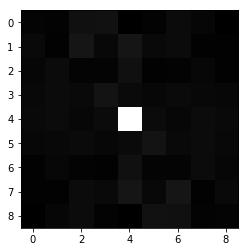

In [18]:
imshow(momen_abs3 - momen_abs)

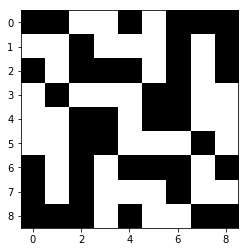

In [19]:
extracted_watermark = np.floor((momen_abs3 - momen_abs) / Q_STEP) % 2
imshow(extracted_watermark)

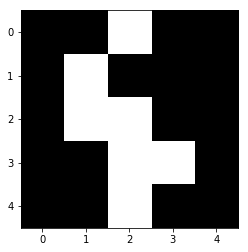

In [20]:
imshow(logobw)